<a href="https://colab.research.google.com/gist/oserikov/f430e81939ffff48cafd6377b9e67b9c/.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание о векторизации текстов

В задании вам предстоит сравнить несколько методов снижения размерности
* PCA
* t-SNE

а так же попробовать осуществить тематическое моделирование методом LDA.

**Формат сдачи задания** -- указание в гуглформе ссылки на тетрадь с решением + ответ на вопросы (см. последние вопросы первой задачи) в форме. Форма появится ближе к дедлайну.

**Дедлайн** 23.59 7 октября MSK.  

ДЗ предполагает возможность получения **до 12 баллов** по десятибалльной шкале. Оценки 11 и 12 поступают в ведомость, как оценки 11 и 12.

---

Если вы уже хорошо знакомы с снижением размерности, реализуйте первую задачу, используя не Bag-of-Words векторы текстов, а эмбеддинги текстов, полученные алгоритмом на ваш выбор. 
**Если вы собираетесь решать задачу так, то, приступая, сообщите об этом @oserikov в телеграме.**

Если вы уже хорошо знакомы ещё и с векторизацией текстов эмбеддингами, напишите @oserikov для обсуждения замены первой задачи на другую.


# [6 баллов] Задача о снижении размерности




[Вот](https://drive.google.com/drive/folders/1HX5rz4UZHtbzhPguUFolOg-xm6HFc0KO?usp=sharing) корпус, однажды собранный без особенных размышлений.
Это -- корпус любительской литературы. Он был собран для забавы и непонятно, какая природа у представленных там текстов.

Вам предстоит оценить, насколько эти тексты интересны в качестве простого датасета для задачи классификации: информативны ли Bag-of-Words векторы в смысле разделения текстов по жанрам.

---

### Постановка задачи

**Задача**: взяв фанифики и два каких-то других жанра из корпуса, визуализировать их BoW-представления на плоскости.

---

Визуализацию стоит осуществлять scatter-плотом, информацию о принадлежности документа какому-то жанру стоит передавать цветом.

Количество документов, представляющих каждый жанр, стоит подобрать семплированием нужного количества элементов под доступные вычислительные ресурсы -- полный корпус точно слишком велик.

Гиперпараметры BoW-векторизатора стоит подобрать под доступные вычислительные ресурсы -- если код работает дольше часа, то стоит упростить вычислительную задачу: подобрать другие гиперпараметры векторизации или уменьшить выборку.

#### Критерии


* **1 БАЛЛ**: 
  * В выбранных документах осуществлена какая-то **стандартная предобработка текста**: удалены стоп-слова и мусорные токены (e.g. html-теги), проведена лемматизация.  
  Решение о каждой конкретной детали предобработки остаётся на усмотрение студентов: каждое нестандартное действие (e.g. отказ от лемматизации или удаление каких-то особенных токенов) стоит пояснить коротким комментарием, описывающим мотивацию.
  * Получены **Bag-of-Words векторы** документов, выбранных для исследования. 
* **1 БАЛЛ**: получена визуализация документов на плоскости **методом главных компонент** снижения размерности Bag-of-Words векторов.
* **1 БАЛЛ**: получена визуализация документов на плоскости методом **t-SNE** снижения размерности Bag-of-Words векторов.
* **1 БАЛЛ**: на полученных визуализациях **получилось передать цветом точек классы** документов; понятно, точка какого цвета относится к какому классу.


Скорее всего визуализация t-SNE и PCA заметно отличаются раскладкой точек по плоскости: один метод как будто раскладывает их вдоль двух пересекающихся прямых, за другим такого свойства скорее всего нет. Ответ на два вопроса ниже вам предстоит указать в гуглформе, сдавая задание.
* **1 БАЛЛ**: верно указано, какой метод укладывает точки примерно вдоль прямых, а какой -- нет
* **1 БАЛЛ**: предложено верное описание тому, почему у одного из методов всегда результаты располагаются вдоль некоторых прямых. 



#### Примеры кода

Использование t-SNE и PCA для визуализации векторов: [ссылка](https://www.kaggle.com/jbencina/clustering-documents-with-tfidf-and-kmeans).





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
import os


df = pd.DataFrame(columns=['genre', 'plaintext'])


for path, dirs, files in os.walk('./Фанфик'):
    for file in files[:200]:
        with open(os.path.join(path, file), 'r', encoding='utf-8') as f:
            df = df.append(
                pd.DataFrame(
                    {
                        'genre': ['fanfiction'],
                        'plaintext': [f.read()]
                    }
                )
            )

for path, dirs, files in os.walk('./Поэзия'):
    for file in files[:200]:
        with open(os.path.join(path, file), 'r', encoding='utf-8') as f:
            df = df.append(
                pd.DataFrame(
                    {
                        'genre': ['poetry'],
                        'plaintext': [f.read()]
                    }
                )
            )

for path, dirs, files in os.walk('./Эзотерика'):
    for file in files[:200]:
        with open(os.path.join(path, file), 'r', encoding='utf-8') as f:
            df = df.append(
                pd.DataFrame(
                    {
                        'genre': ['esoteric'],
                        'plaintext': [f.read()]
                    }
                )
            )

In [3]:
df = df.reset_index(drop=True)
df.head()

,genre,plaintext
0,fanfiction,\nЛенточка \n\n Фанфик по роману ...
1,fanfiction,"\n"" Mass Effect : While the Reaper ""\n\nНазва:..."
2,fanfiction,\n\nДмитрий Крам.\nS-T-I-K-S. Подкидыши Улья.\...
3,fanfiction,\n\n\nДмитрий Крам.\n\nИсчезнувший клан. Фанфи...
4,fanfiction,\n\n\t\n\t\t\n\t\t\t\n\t\t\t\tСодержание:\n\t\...


In [4]:
df['genre'].value_counts()

esoteric      200
fanfiction    200
poetry        200
Name: genre, dtype: int64

In [5]:
import re
from spacy.lang.ru import Russian


def tokenize(text):
    nlp = Russian()
    nlp.max_length = 3_000_000
    doc = nlp(text)
    return [token.text.lower() for token in doc if re.match(r'^[\w]+$', token.text)]


df['tokens'] = df['plaintext'].apply(tokenize)

df.head()

,genre,plaintext,tokens
0,fanfiction,\nЛенточка \n\n Фанфик по роману ...,"[ленточка, фанфик, по, роману, андрея, круза, ..."
1,fanfiction,"\n"" Mass Effect : While the Reaper ""\n\nНазва:...","[mass, effect, while, the, reaper, назва, mass..."
2,fanfiction,\n\nДмитрий Крам.\nS-T-I-K-S. Подкидыши Улья.\...,"[дмитрий, крам, s, t, i, k, подкидыши, улья, а..."
3,fanfiction,\n\n\nДмитрий Крам.\n\nИсчезнувший клан. Фанфи...,"[дмитрий, крам, исчезнувший, клан, фанфик, по,..."
4,fanfiction,\n\n\t\n\t\t\n\t\t\t\n\t\t\t\tСодержание:\n\t\...,"[содержание, часть, 1, акклиматиазия, часть, 2..."


In [6]:
import pymorphy2


morph = pymorphy2.MorphAnalyzer()


def lemmatize(tokens):
    lemms = []
    for token in tokens:
        lemms.append(morph.parse(token)[0].normal_form)
    return lemms


df['lemmas'] = df['tokens'].apply(lemmatize)

In [7]:
df.head()

,genre,plaintext,tokens,lemmas
0,fanfiction,\nЛенточка \n\n Фанфик по роману ...,"[ленточка, фанфик, по, роману, андрея, круза, ...","[ленточка, фанфик, по, роман, андрей, круз, зе..."
1,fanfiction,"\n"" Mass Effect : While the Reaper ""\n\nНазва:...","[mass, effect, while, the, reaper, назва, mass...","[mass, effect, while, the, reaper, назвый, mas..."
2,fanfiction,\n\nДмитрий Крам.\nS-T-I-K-S. Подкидыши Улья.\...,"[дмитрий, крам, s, t, i, k, подкидыши, улья, а...","[дмитрий, крам, s, t, i, k, подкидыш, улья, ан..."
3,fanfiction,\n\n\nДмитрий Крам.\n\nИсчезнувший клан. Фанфи...,"[дмитрий, крам, исчезнувший, клан, фанфик, по,...","[дмитрий, крам, исчезнуть, клан, фанфик, по, и..."
4,fanfiction,\n\n\t\n\t\t\n\t\t\t\n\t\t\t\tСодержание:\n\t\...,"[содержание, часть, 1, акклиматиазия, часть, 2...","[содержание, часть, 1, акклиматиазия, часть, 2..."


In [8]:
df.to_csv("lemmatized_df.csv")

In [2]:
df = pd.read_csv("lemmatized_df.csv")
df.head()

,Unnamed: 0,genre,plaintext,tokens,lemmas
0,0,fanfiction,\nЛенточка \n\n Фанфик по роману ...,"['ленточка', 'фанфик', 'по', 'роману', 'андрея...","['ленточка', 'фанфик', 'по', 'роман', 'андрей'..."
1,1,fanfiction,"\n"" Mass Effect : While the Reaper ""\n\nНазва:...","['mass', 'effect', 'while', 'the', 'reaper', '...","['mass', 'effect', 'while', 'the', 'reaper', '..."
2,2,fanfiction,\n\nДмитрий Крам.\nS-T-I-K-S. Подкидыши Улья.\...,"['дмитрий', 'крам', 's', 't', 'i', 'k', 'подки...","['дмитрий', 'крам', 's', 't', 'i', 'k', 'подки..."
3,3,fanfiction,\n\n\nДмитрий Крам.\n\nИсчезнувший клан. Фанфи...,"['дмитрий', 'крам', 'исчезнувший', 'клан', 'фа...","['дмитрий', 'крам', 'исчезнуть', 'клан', 'фанф..."
4,4,fanfiction,\n\n\t\n\t\t\n\t\t\t\n\t\t\t\tСодержание:\n\t\...,"['содержание', 'часть', '1', 'акклиматиазия', ...","['содержание', 'часть', '1', 'акклиматиазия', ..."


In [3]:
import ast


df["tokens"] = df["tokens"].apply(lambda x: ast.literal_eval(x))
df["lemmas"] = df["lemmas"].apply(lambda x: ast.literal_eval(x))

In [4]:
df.head()

,Unnamed: 0,genre,plaintext,tokens,lemmas
0,0,fanfiction,\nЛенточка \n\n Фанфик по роману ...,"[ленточка, фанфик, по, роману, андрея, круза, ...","[ленточка, фанфик, по, роман, андрей, круз, зе..."
1,1,fanfiction,"\n"" Mass Effect : While the Reaper ""\n\nНазва:...","[mass, effect, while, the, reaper, назва, mass...","[mass, effect, while, the, reaper, назвый, mas..."
2,2,fanfiction,\n\nДмитрий Крам.\nS-T-I-K-S. Подкидыши Улья.\...,"[дмитрий, крам, s, t, i, k, подкидыши, улья, а...","[дмитрий, крам, s, t, i, k, подкидыш, улья, ан..."
3,3,fanfiction,\n\n\nДмитрий Крам.\n\nИсчезнувший клан. Фанфи...,"[дмитрий, крам, исчезнувший, клан, фанфик, по,...","[дмитрий, крам, исчезнуть, клан, фанфик, по, и..."
4,4,fanfiction,\n\n\t\n\t\t\n\t\t\t\n\t\t\t\tСодержание:\n\t\...,"[содержание, часть, 1, акклиматиазия, часть, 2...","[содержание, часть, 1, акклиматиазия, часть, 2..."


In [6]:
from nltk.corpus import stopwords
stopwords_ = stopwords.words("russian")


def join_exclude(x):
    res = ""
    for elem in x:
        if (elem not in stopwords_) and (elem.isalpha()):
            res += elem + " "
    res = res.strip()
    return res

In [ ]:
join_exclude(df["lemmas"][4])

In [8]:
values = list(map(
    join_exclude,
    df["lemmas"].values
))

In [ ]:
values[:5]

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(values)

X.toarray()

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  5,  4, 14],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [10]:
type(X)

scipy.sparse.csr.csr_matrix

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(X.toarray())
pca_df = pd.concat(
    [
        pd.DataFrame(data=components, columns=["comp1", "comp2"]),
        df["genre"]
    ],
    axis=1)

In [12]:
pca_df.head()

,comp1,comp2,genre
0,-145.506576,-5.492319,fanfiction
1,-219.628360,17.046636,fanfiction
2,677.568485,-78.799482,fanfiction
3,1138.278206,-227.408393,fanfiction
4,497.229162,-46.261009,fanfiction


In [13]:
pca_df.to_csv("pca.csv")

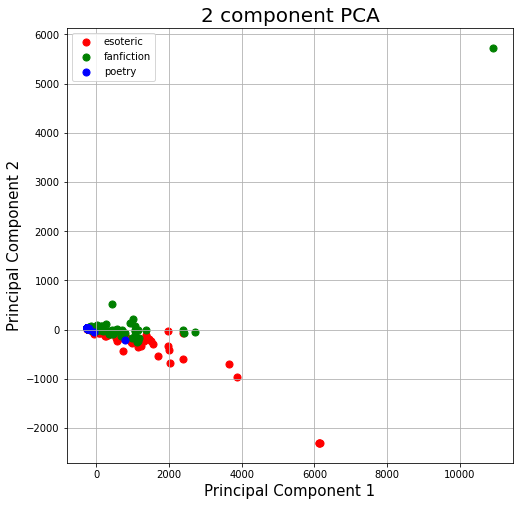

In [14]:
# https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1) 
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)
targets = np.unique(df["genre"])
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indices = pca_df["genre"] == target
    ax.scatter(pca_df.loc[indices, 'comp1']
               , pca_df.loc[indices, 'comp2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [15]:
pca_df[pca_df["comp1"] > 10_000]

,comp1,comp2,genre
137,10900.366589,5729.647922,fanfiction


In [16]:
df["plaintext"][137][:1000]

'\n\nАвтор: The Lemon Sage\nПереводчик: Дул\nСопереводчики: венчик, Cool Kitty\nБеты: НастЮША Торгунакова, Lady Креведко\nОригинальный текст: http://ficwad.com/story/213011\nПеревод на ficbook.net: https://ficbook.net/readfic/2201309\nГруппа в ВК: https://vk.com/club94190838\nСсылка на ФвФ (фанфик в файле) http://www.fanfics.me/ftf16452 (обновляется не сразу после выхода новой главы)\nФэндом: Naruto\nПэйринг или персонажи: Наруто/Гарем\nРейтинг: NC-21\nЖанры: Гет, Фэнтези, Экшн (action), AU\nПредупреждения: BDSM, OOC, Нецензурная лексика, Групповой секс, Underage, Секс с использованием посторонних предметов, Смена пола (gender switch), Полиамория, Смерть второстепенного персонажа, Элементы фемслэша\nПредупреждение переводчика: Позже, во время перевода, возможно буду править жанры и предупреждения.\nПримечания переводчика: данный фанфик непомерно огромен и переводится будет чрезвычайно долго, и не только из-за меня, но собственно из-за объема.\nТе, у кого вдруг проснулись желания начать

Я не знаю, чем этот фанфик такой особенный (есть подозрение, что проблема в жанрах), но давайте уберем его, чтобы посмотреть остальное поближе

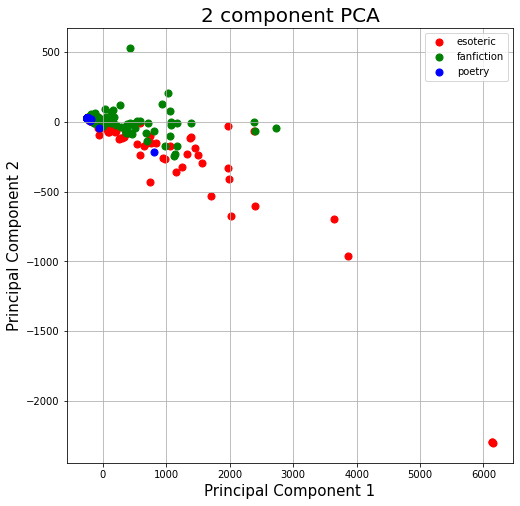

In [17]:
dropped = pca_df.drop(df.index[[137]])


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = np.unique(df["genre"])
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indices = dropped["genre"] == target
    ax.scatter(dropped.loc[indices, 'comp1']
               , dropped.loc[indices, 'comp2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [18]:
dropped[dropped["comp1"] > 6000]

,comp1,comp2,genre
560,6150.154502,-2303.729077,esoteric
561,6127.672309,-2297.922461,esoteric
562,6127.672309,-2297.922461,esoteric


In [19]:
df["plaintext"][560][:1000]

'\n\n \n \n\n\n\n\n\nАнастасия Рай\n\n\n\n\nЖЕНЩИНА В МИРЕ МУЖЧИН\n\n\n\n\n(Или 40 лет одиночества)\n\n\n \n\n\n\nГЛАВАI.  ВОЗМОЖНО, ЭТО ЗНАК...\n\n\n \n\n Поскольку моя особа - упрямый скептик со стажем, каких поискать и коий сам должен до всего докапаться, - ни за что бы не поверила, если бы мне о подобном явлении кто-либо рассказал, но... всё же приходилось верить своим собственным глазам. Хотя никогда не думала, что мне доведётся подобное увидать: казалось, радуга начинается у самых ног - почти в центре лишь недавно с любовью высаженного фруктового сада - и заканчивается уже в районе Чёрного моря, которого не было видно с террасы второго этажа нашего дома, где мы с мужем отдыхали, - но я знала, где оно находится географически, и именно туда "дуга РА" и заворачивала. Зрелище, честно признаться, было феерическое! Никогда до сего случая мне не удавалось лицезреть "семицветку" столько близко: я даже считала, что найти её начало и конец в принципе невозможно и нереально, - и тут такой п

In [21]:
df["plaintext"][562][:1000]

'\n\n \n \n\n\n\n\n\nАнастасия Рай\n\n\n\n\nЖЕНЩИНА В МИРЕ МУЖЧИН\n\n\n\n\n(Или 40 лет одиночества)\n\n\n \n\n\nГЛАВАI.  ВОЗМОЖНО, ЭТО ЗНАК...\n\n\n \n Поскольку моя особа - упрямый скептик со стажем, каких поискать и коий сам должен до всего докапаться, - ни за что бы не поверила, если бы мне о подобном явлении кто-либо рассказал, но... всё же приходилось верить своим собственным глазам. Хотя никогда не думала, что мне доведётся подобное увидать: казалось, радуга начинается у самых ног - почти в центре лишь недавно с любовью высаженного фруктового сада - и заканчивается уже в районе Чёрного моря, которого не было видно с террасы второго этажа нашего дома, где мы с мужем отдыхали, - но я знала, где оно находится географически, и именно туда "дуга РА" и заворачивала. Зрелище, честно признаться, было феерическое! Никогда до сего случая мне не удавалось лицезреть "семицветку" столько близко: я даже считала, что найти её начало и конец в принципе невозможно и нереально, - и тут такой подар

То есть эта одна точка справа внизу – это три точки, но являющиеся одним и тем же произведением в немного разных версиях (например, у 560 меньше `\n` перед `ГЛАВА I`)

А вообще похоже, что произведения более-менее слиплись в кучу

In [22]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(X.toarray())

In [23]:
tsne_results

array([[-10.008449, -15.573068],
       [-10.738125,  22.617706],
       [-17.409086, -31.23628 ],
       ...,
       [ -9.435711, -12.60216 ],
       [-23.995035, -34.091362],
       [-19.16233 , -26.380655]], dtype=float32)

In [24]:
tsne_df = pd.concat(
    [
        pd.DataFrame(data=tsne_results, columns=["comp1", "comp2"]),
        df["genre"]
    ],
    axis=1)

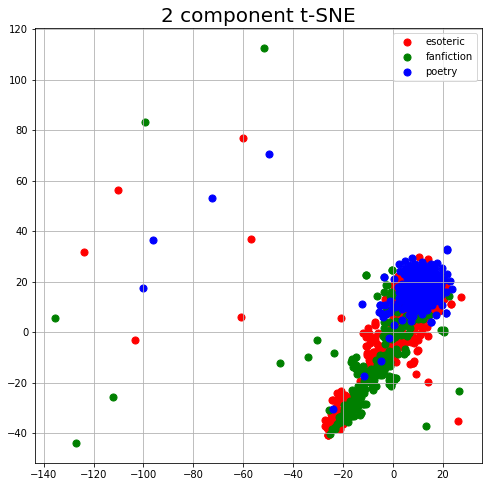

In [26]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('2 component t-SNE', fontsize=20)
targets = np.unique(df["genre"])
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indices = tsne_df["genre"] == target
    ax.scatter(tsne_df.loc[indices, 'comp1']
               , tsne_df.loc[indices, 'comp2']
               , c=color
               , s=50)
ax.legend(targets)
ax.grid()

Оно все равно сбилось в кучу вместо того, чтобы нормально кластеризоваться... Ну поэзия вон более-менее одним конкретным кружочком

PCA укладывает вдоль прямых, t-SNE нет. Почему — ну потому что PCA линейный, а t-SNE нет

## [6 баллов] Задача о тематическом моделировании



### об LDA




### Постановка задачи
Загрузите [коллекцию писем Х. Клинтон](https://www.kaggle.com/kaggle/hillary-clinton-emails/?select=Emails.csv) с kaggle. Для скачивания может потребоваться регистрация.

Методом LDA выделите несколько тем в переписке Х. Клинтон, дайте им словесное описание. Используйте библиотеку LdaModel из gensim.

#### Критерии

* **2 БАЛЛА**: получены списки ключевых слов, не выглядящие бессмыслицей
* **2 БАЛЛА**: осуществлена визуализация библиотекой pyLDAvis
* **1 БАЛЛ**: предложено осмысленное текстовое описание большинства выделенных тем.
* **1 БАЛЛ**: проведено сравнение LDA, запущенного на CountVectorizer и TfIdfVectorizer предтавлениях одних и тех же данных. 

#### примеры кода

Пример обучения LdaModel на выдаче CountVectorizer: [ссылка](https://github.com/EricSchles/sklearn_gensim_example/blob/master/example.py)

Пример использования pyLDAvis: секция 15 [по ссылке](https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/)

---

Для обучения *LdaModel* и её последующей визуализации потребуется словарь формата gensim. Словарь формата gensim удобно получать из сжатого csc_matrix-представления нашего векторизованного текста: как многие замечали на паре, tf-idf векторы содержат много нулей.

```python
import gensim
from scipy.sparse import csc

corpus = gensim.matutils.Sparse2Corpus(csc.csc_matrix(X))
dictionary = gensim.corpora.Dictionary.from_corpus(corpus, vocab_dict)
```

где *corpora* содержит полученное с помощью gensim представление коллекции, а *vocab_dict* — это dict, полученный после работы Vectorizer, ставящий в соответствие каждому номеру строки в матрице данных само слово в виде строки.

In [30]:
!unzip archive.zip

Archive:  archive.zip
  inflating: Aliases.csv             
  inflating: EmailReceivers.csv      
  inflating: Emails.csv              
  inflating: Persons.csv             
  inflating: database.sqlite         
  inflating: hashes.txt              


In [2]:
import pandas as pd

In [3]:
emails = pd.read_csv("Emails.csv")

emails.head()

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


In [4]:
emails.shape

(7945, 22)

In [5]:
from gensim import matutils
from gensim.models.ldamodel import LdaModel
from sklearn import linear_model
from sklearn.datasets import fetch_20newsgroups

In [6]:
def print_features(clf, vocab, n=10):
    """ Print sorted list of non-zero features/weights. """
    coef = clf.coef_[0]
    print('positive features: %s' % (' '.join(['%s/%.2f' % (vocab[j], coef[j]) for j in np.argsort(coef)[::-1][:n] if coef[j] > 0])))
    print('negative features: %s' % (' '.join(['%s/%.2f' % (vocab[j], coef[j]) for j in np.argsort(coef)[:n] if coef[j] < 0])))


def fit_classifier(X, y, C=0.1):
    """ Fit L1 Logistic Regression classifier. """
    # Smaller C means fewer features selected.
    clf = linear_model.LogisticRegression(penalty='l1', C=C)
    clf.fit(X, y)
    return clf


def fit_lda(X, vocab, num_topics=5, passes=20):
    """ Fit LDA from a scipy CSR matrix (X). """
    print('fitting lda...')
    return LdaModel(matutils.Sparse2Corpus(X.T), num_topics=num_topics,
                    passes=passes,
                    id2word=dict([(i, s) for i, s in enumerate(vocab)]))


def print_topics(lda, vocab, n=10):
    """ Print the top words for each topic. """
    topics = lda.print_topics(num_topics=-1, num_words=n)
    for topic in topics:
        print(topic)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(stop_words='english')  # вот так я узнала, что могла выше не писать join_exclude
X = vec.fit_transform(emails.RawText)
vocab = vec.get_feature_names()

lda = fit_lda(X, vocab)
print_topics(lda, vocab)

fitting lda...
(0, '0.022*"pm" + 0.020*"30" + 0.016*"state" + 0.014*"department" + 0.013*"secretary" + 0.013*"office" + 0.010*"10" + 0.009*"case" + 0.009*"00" + 0.009*"unclassified"')
(1, '0.011*"state" + 0.009*"department" + 0.007*"case" + 0.007*"unclassified" + 0.007*"date" + 0.007*"doc" + 0.007*"2015" + 0.007*"2014" + 0.007*"20439" + 0.006*"31"')
(2, '0.023*"state" + 0.016*"2015" + 0.012*"subject" + 0.011*"benghazi" + 0.010*"sensitive" + 0.009*"information" + 0.009*"13" + 0.009*"house" + 0.008*"agreement" + 0.008*"05"')
(3, '0.043*"state" + 0.027*"date" + 0.026*"sent" + 0.026*"department" + 0.026*"unclassified" + 0.026*"doc" + 0.026*"case" + 0.026*"2015" + 0.026*"20439" + 0.026*"2014"')
(4, '0.007*"state" + 0.007*"case" + 0.007*"date" + 0.007*"obama" + 0.006*"20439" + 0.006*"2014" + 0.006*"department" + 0.006*"doc" + 0.006*"unclassified" + 0.006*"2015"')


In [10]:
from nltk.corpus import stopwords

eng_stopwords = stopwords.words("english") + ["unclassified", "state", "department", "date", "doc", "subject", "send", "cc", "fw"]


# state, date и т.д. много используются в письмах как подпись или еще какая-то обязательная часть

In [11]:
vec = CountVectorizer(stop_words=eng_stopwords)  # вот так я узнала, что могла выше не писать join_exclude
X = vec.fit_transform(emails.RawText)
vocab = vec.get_feature_names()

lda = fit_lda(X, vocab)
print_topics(lda, vocab)

fitting lda...
(0, '0.017*"2015" + 0.016*"pm" + 0.013*"benghazi" + 0.012*"sensitive" + 0.011*"house" + 0.010*"05" + 0.010*"information" + 0.010*"13" + 0.009*"dept" + 0.009*"produced"')
(1, '0.030*"sent" + 0.028*"case" + 0.028*"2015" + 0.028*"20439" + 0.027*"2014" + 0.022*"31" + 0.019*"08" + 0.019*"gov" + 0.017*"2010" + 0.014*"message"')
(2, '0.007*"case" + 0.006*"2015" + 0.006*"2014" + 0.006*"20439" + 0.005*"haiti" + 0.005*"government" + 0.005*"31" + 0.004*"security" + 0.004*"08" + 0.004*"united"')
(3, '0.024*"case" + 0.024*"20439" + 0.024*"2014" + 0.024*"2015" + 0.022*"31" + 0.019*"sent" + 0.018*"08" + 0.013*"cheryl" + 0.013*"2010" + 0.011*"mills"')
(4, '0.007*"said" + 0.006*"case" + 0.006*"2015" + 0.006*"31" + 0.006*"20439" + 0.006*"2014" + 0.005*"obama" + 0.005*"would" + 0.005*"08" + 0.004*"president"')


Ладно, окей, все-таки придется предобрабатывать, а не просто передать `stop_words` в `CountVectorizer`

In [12]:
import spacy
nlp = spacy.load('en')

In [13]:
[token.lemma_.lower() for token in nlp(emails["RawText"][0])]

['unclassified',
 '\n',
 'u.s.',
 'department',
 'of',
 'state',
 '\n',
 'case',
 'no',
 '.',
 'f-2015',
 '-',
 '04841',
 '\n',
 'doc',
 'no',
 '.',
 'c05739545',
 '\n',
 'date',
 ':',
 '05/13/2015',
 '\n',
 'state',
 'dept',
 '.',
 '-',
 'produced',
 'to',
 'house',
 'select',
 'benghazi',
 'comm',
 '.',
 '\n',
 'subject',
 'to',
 'agreement',
 'on',
 'sensitive',
 'information',
 '&',
 'redactions',
 '.',
 'no',
 'foia',
 'waiver',
 '.',
 '\n',
 'release',
 'in',
 'full',
 '\n',
 'from',
 ':',
 'sullivan',
 ',',
 'jacob',
 'j',
 '<',
 'sullivan11@state.gov',
 '>',
 '\n',
 'send',
 ':',
 'wednesday',
 ',',
 'september',
 '12',
 ',',
 '2012',
 '10:16',
 'am',
 '\n',
 'to',
 ':',
 '\n',
 'subject',
 ':',
 'fw',
 ':',
 'wow',
 '\n',
 'from',
 ':',
 'brose',
 ',',
 'christian',
 '(',
 'armed',
 'services',
 ')',
 '(',
 'mailto',
 ':',
 'christian_brose@arme',
 '-',
 'servic',
 ',',
 'essenate.govi',
 '\n',
 'send',
 ':',
 'wednesday',
 ',',
 'september',
 '12',
 ',',
 '2012',
 '10:09',
 '

In [14]:
eng_stopwords += ["pm", "dept"]

def join_exclude(x):
    res = ""
    for elem in x:
        if (elem not in eng_stopwords) and (elem.isalpha()):
            res += elem + " "
    res = res.strip()
    return res

In [15]:
emails["Tokens"] = emails["RawText"].apply(
    lambda x: [token.lemma_.lower() for token in nlp(x)]
)

In [16]:
emails["CleanedText"] = emails["Tokens"].apply(join_exclude)

In [17]:
emails.head()

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText,Tokens,CleanedText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...,"[unclassified, \n, u.s., department, of, state...",case produced house select benghazi comm agree...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...,"[unclassified, \n, u.s., department, of, state...",case produced house select benghazi comm agree...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,"Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...,"[unclassified, \n, u.s., department, of, state...",case produced house select benghazi comm agree...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,"Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...,"[unclassified, \n, u.s., department, of, state...",case produced house select benghazi comm agree...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...,"[b6, \n, unclassified, \n, u.s., department, o...",case produced house select benghazi comm agree...


In [18]:
vec = CountVectorizer()
X = vec.fit_transform(emails.CleanedText)
vocab = vec.get_feature_names()

lda = fit_lda(X, vocab)
print_topics(lda, vocab)

fitting lda...
(0, '0.009*"case" + 0.009*"government" + 0.007*"information" + 0.007*"benghazi" + 0.006*"security" + 0.006*"sensitive" + 0.006*"agreement" + 0.005*"house" + 0.005*"select" + 0.005*"development"')
(1, '0.029*"case" + 0.024*"cheryl" + 0.021*"mills" + 0.011*"release" + 0.008*"jacob" + 0.008*"sullivan" + 0.008*"haiti" + 0.008*"secretary" + 0.006*"part" + 0.006*"message"')
(2, '0.011*"say" + 0.008*"case" + 0.006*"obama" + 0.005*"would" + 0.005*"one" + 0.005*"president" + 0.004*"make" + 0.004*"new" + 0.004*"year" + 0.003*"american"')
(3, '0.012*"case" + 0.009*"say" + 0.007*"would" + 0.004*"party" + 0.004*"may" + 0.004*"government" + 0.004*"deal" + 0.004*"president" + 0.004*"election" + 0.004*"make"')
(4, '0.057*"case" + 0.029*"message" + 0.028*"original" + 0.026*"huma" + 0.024*"abedin" + 0.023*"release" + 0.023*"call" + 0.012*"full" + 0.011*"part" + 0.009*"sullivan"')


Если выделять 5 тем, то получаем:
* Видимо, Beghazi attack
* Jacob Sullivan, еще есть имена собственные Cheryl и Mills (но я не поняла, кто это конкретно) и почему-то Haiti. Такое чувство, что мне не хватает какого-то общественно-политического контекста Штатов
* Обама как новый президент
* До перезапуска тетрадки и добавления новых стоп-слов `subject`, `send`, `fw` и `cc` в одной теме с `deal` еще было `Israel` и `leader`. Наверное, какой-то договор между правителями, почему эти слова исчезли вместе со стоп-словами – не понимаю
* Huma Abedin

Кажется, слово case тоже по-хорошему надо убирать

In [ ]:
!pip install pyLDAvis

In [19]:
import pyLDAvis.gensim

In [26]:
vec.vocabulary_

/home/goldstein/venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'case': 4823,
 'produced': 25738,
 'house': 14692,
 'select': 29314,
 'benghazi': 3211,
 'comm': 6007,
 'agreement': 729,
 'sensitive': 29400,
 'information': 15753,
 'redactions': 26973,
 'foia': 11817,
 'waiver': 35314,
 'release': 27260,
 'full': 12289,
 'sullivan': 31676,
 'jacob': 16608,
 'wednesday': 35547,
 'september': 29435,
 'wow': 36127,
 'brose': 4192,
 'christian': 5425,
 'armed': 1916,
 'services': 29491,
 'mailto': 19467,
 'servic': 29485,
 'wonderful': 36032,
 'strong': 31441,
 'moving': 21352,
 'statement': 31133,
 'boss': 3905,
 'please': 24904,
 'tell': 32407,
 'much': 21442,
 'mccain': 20033,
 'appreciate': 1720,
 'part': 24009,
 'attachment': 2255,
 'thursday': 32792,
 'march': 19709,
 'latest': 18194,
 'syria': 31982,
 'aid': 785,
 'qaddafi': 26217,
 'sid': 29964,
 'hrc': 14732,
 'memo': 20327,
 'libya': 18631,
 'confidential': 6310,
 'hillary': 14327,
 'two': 33714,
 'one': 23133,
 'report': 27432,
 'provide': 25961,
 'air': 816,
 'support': 31768,
 'note': 2252

In [ ]:
import gensim
from scipy.sparse import csc

corpus = gensim.matutils.Sparse2Corpus(csc.csc_matrix(X))
dictionary = gensim.corpora.Dictionary.from_corpus(corpus, {v: k for k, v in vec.vocabulary_.items()})

In [30]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
vis

/home/goldstein/venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.124673 -0.036170       1        1  38.756892
0      0.187814  0.105278       2        1  21.371127
1     -0.121834  0.086764       3        1  15.415402
3      0.056195 -0.142453       4        1  15.412223
4     -0.246849 -0.013419       5        1   9.044356, topic_info=          Term          Freq         Total Category  logprob  loglift
0         case  23545.000000  23545.000000  Default  30.0000  30.0000
414     cheryl   5295.000000   5295.000000  Default  29.0000  29.0000
421    message   6113.000000   6113.000000  Default  28.0000  28.0000
420   original   5243.000000   5243.000000  Default  27.0000  27.0000
413      mills   4508.000000   4508.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
246       time    676.840523   3794.787165   Topic5  -5.2421   0.6791
393       know    621.878382   3326.995336   Topic5  -5.3268   0.7259
1257      want    606.788392   2862.432315   Topic5  -5.3514   0.8518
2480    monday    569.074473   1788.547769   Topic5  -5.4156   1.2579
749        see    573.875776   3423.701130   Topic5  -5.4072   0.6170

[422 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
415       3  0.071316     abedin
415       4  0.000306     abedin
415       5  0.928029     abedin
1778      2  0.988863  abushagur
4147      1  0.994885   activist
...     ...       ...        ...
724       1  0.599704       year
724       2  0.184524       year
724       3  0.066535       year
724       4  0.149335       year
8938      4  0.998501     zelaya

[903 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2, 4, 5])

In [21]:
help(pyLDAvis.gensim.prepare)

Help on function prepare in module pyLDAvis.gensim:

prepare(topic_model, corpus, dictionary, doc_topic_dist=None, **kwargs)
    Transforms the Gensim TopicModel and related corpus and dictionary into
    the data structures needed for the visualization.
    
    Parameters
    ----------
    topic_model : gensim.models.ldamodel.LdaModel
        An already trained Gensim LdaModel. The other gensim model types are
        not supported (PRs welcome).
    
    corpus : array-like list of bag of word docs in tuple form or scipy CSC matrix
        The corpus in bag of word form, the same docs used to train the model.
        The corpus is transformed into a csc matrix internally, if you intend to
        call prepare multiple times it is a good idea to first call
        `gensim.matutils.corpus2csc(corpus)` and pass in the csc matrix instead.
    
    For example: [(50, 3), (63, 5), ....]
    
    dictionary: gensim.corpora.Dictionary
        The dictionary object used to create the corpus

/home/goldstein/venv/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
